# BBC News documents Classification

This script is trying to build a predictive model to automatically label the category for each news article. The raw text files are download from http://mlg.ucd.ie/datasets/bbc.html. The main procedure has the following steps:
1. Create a dataframe storing all news data.
2. Clean and preprocess the raw texts (e.g. remove non-words, word stemming). Create training and test datasets.
3. Convert each news article to a feature vector using bag-of-word approach.
4. Build a classification pipeline which includes vectorizer, featureSelection, and classifier. 
5. Train the pipeline with training sets, turn the model parameters.
6. Evaluate the trained model. Apply the optimized model to the test datasets for category prediction. Calculate classifcaition accuracy, consufion matrix.
7. Take some interesting news from BBC website, preprocess them, and input them to optimized model to see how does the model works. 

RESULTS:

Prediction accuracy of Training set: 0.992

Prediction accuracy of Test set: 0.973

In [1]:
# import the Pyton packages
import os
import re  # regular expression
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('darkgrid')

In [2]:
# somethings needed to be downloaded from nltk
# import nltk
# nltk.download('stopwords')

## 1. Preparing the data:

### 1) DataFrame creation
Create a DataFrame which include all raw text files.

In [3]:
# change current directory to given path
data_folder = "bbc"
folders = ["business", "entertainment", "politics", "sport", "tech"]
os.chdir(data_folder)

In [4]:
# read all raw text files, save them as a DataFrame and write into a .csv
title = []
content = []
category = []
category_id = []
filename = []

for i, folder in enumerate(folders):
    files = os.listdir(folder)  # list all the files in the dir: '001.txt','002.txt'...
    
    for text_file in files:
        file_path = folder + "/" + text_file
        
        print("reading file:", file_path)
        with open(file_path) as f:
            data = f.readlines()
            
        title.append(data[0].strip('\n')) 
        
        data = ' '.join(data)
        content.append(data)
        category.append(folder)
        category_id.append(i)
        
    filename += files          # concatenate all file names of all 5 folders 

# create a DataFrame
df = pd.DataFrame(data=content, columns=['content'])
# add different columns into the DataFrame
df['category'] = category
df['category_id'] = category_id
df['title'] = title
df['filename'] = filename
df = df[['category', 'filename', 'title', 'content', 'category_id']]  # reordering

print('writing csv flie ...')
# df.to_csv('dataset.csv', index=False)

reading file: business/001.txt
reading file: business/002.txt
reading file: business/003.txt
reading file: business/004.txt
reading file: business/005.txt
reading file: business/006.txt
reading file: business/007.txt
reading file: business/008.txt
reading file: business/009.txt
reading file: business/010.txt
reading file: business/011.txt
reading file: business/012.txt
reading file: business/013.txt
reading file: business/014.txt
reading file: business/015.txt
reading file: business/016.txt
reading file: business/017.txt
reading file: business/018.txt
reading file: business/019.txt
reading file: business/020.txt
reading file: business/021.txt
reading file: business/022.txt
reading file: business/023.txt
reading file: business/024.txt
reading file: business/025.txt
reading file: business/026.txt
reading file: business/027.txt
reading file: business/028.txt
reading file: business/029.txt
reading file: business/030.txt
reading file: business/031.txt
reading file: business/032.txt
reading 

reading file: business/304.txt
reading file: business/305.txt
reading file: business/306.txt
reading file: business/307.txt
reading file: business/308.txt
reading file: business/309.txt
reading file: business/310.txt
reading file: business/311.txt
reading file: business/312.txt
reading file: business/313.txt
reading file: business/314.txt
reading file: business/315.txt
reading file: business/316.txt
reading file: business/317.txt
reading file: business/318.txt
reading file: business/319.txt
reading file: business/320.txt
reading file: business/321.txt
reading file: business/322.txt
reading file: business/323.txt
reading file: business/324.txt
reading file: business/325.txt
reading file: business/326.txt
reading file: business/327.txt
reading file: business/328.txt
reading file: business/329.txt
reading file: business/330.txt
reading file: business/331.txt
reading file: business/332.txt
reading file: business/333.txt
reading file: business/334.txt
reading file: business/335.txt
reading 

reading file: entertainment/059.txt
reading file: entertainment/060.txt
reading file: entertainment/061.txt
reading file: entertainment/062.txt
reading file: entertainment/063.txt
reading file: entertainment/064.txt
reading file: entertainment/065.txt
reading file: entertainment/066.txt
reading file: entertainment/067.txt
reading file: entertainment/068.txt
reading file: entertainment/069.txt
reading file: entertainment/070.txt
reading file: entertainment/071.txt
reading file: entertainment/072.txt
reading file: entertainment/073.txt
reading file: entertainment/074.txt
reading file: entertainment/075.txt
reading file: entertainment/076.txt
reading file: entertainment/077.txt
reading file: entertainment/078.txt
reading file: entertainment/079.txt
reading file: entertainment/080.txt
reading file: entertainment/081.txt
reading file: entertainment/082.txt
reading file: entertainment/083.txt
reading file: entertainment/084.txt
reading file: entertainment/085.txt
reading file: entertainment/

reading file: entertainment/328.txt
reading file: entertainment/329.txt
reading file: entertainment/330.txt
reading file: entertainment/331.txt
reading file: entertainment/332.txt
reading file: entertainment/333.txt
reading file: entertainment/334.txt
reading file: entertainment/335.txt
reading file: entertainment/336.txt
reading file: entertainment/337.txt
reading file: entertainment/338.txt
reading file: entertainment/339.txt
reading file: entertainment/340.txt
reading file: entertainment/341.txt
reading file: entertainment/342.txt
reading file: entertainment/343.txt
reading file: entertainment/344.txt
reading file: entertainment/345.txt
reading file: entertainment/346.txt
reading file: entertainment/347.txt
reading file: entertainment/348.txt
reading file: entertainment/349.txt
reading file: entertainment/350.txt
reading file: entertainment/351.txt
reading file: entertainment/352.txt
reading file: entertainment/353.txt
reading file: entertainment/354.txt
reading file: entertainment/

reading file: politics/197.txt
reading file: politics/198.txt
reading file: politics/199.txt
reading file: politics/200.txt
reading file: politics/201.txt
reading file: politics/202.txt
reading file: politics/203.txt
reading file: politics/204.txt
reading file: politics/205.txt
reading file: politics/206.txt
reading file: politics/207.txt
reading file: politics/208.txt
reading file: politics/209.txt
reading file: politics/210.txt
reading file: politics/211.txt
reading file: politics/212.txt
reading file: politics/213.txt
reading file: politics/214.txt
reading file: politics/215.txt
reading file: politics/216.txt
reading file: politics/217.txt
reading file: politics/218.txt
reading file: politics/219.txt
reading file: politics/220.txt
reading file: politics/221.txt
reading file: politics/222.txt
reading file: politics/223.txt
reading file: politics/224.txt
reading file: politics/225.txt
reading file: politics/226.txt
reading file: politics/227.txt
reading file: politics/228.txt
reading 

reading file: sport/056.txt
reading file: sport/057.txt
reading file: sport/058.txt
reading file: sport/059.txt
reading file: sport/060.txt
reading file: sport/061.txt
reading file: sport/062.txt
reading file: sport/063.txt
reading file: sport/064.txt
reading file: sport/065.txt
reading file: sport/066.txt
reading file: sport/067.txt
reading file: sport/068.txt
reading file: sport/069.txt
reading file: sport/070.txt
reading file: sport/071.txt
reading file: sport/072.txt
reading file: sport/073.txt
reading file: sport/074.txt
reading file: sport/075.txt
reading file: sport/076.txt
reading file: sport/077.txt
reading file: sport/078.txt
reading file: sport/079.txt
reading file: sport/080.txt
reading file: sport/081.txt
reading file: sport/082.txt
reading file: sport/083.txt
reading file: sport/084.txt
reading file: sport/085.txt
reading file: sport/086.txt
reading file: sport/087.txt
reading file: sport/088.txt
reading file: sport/089.txt
reading file: sport/090.txt
reading file: sport/

reading file: sport/366.txt
reading file: sport/367.txt
reading file: sport/368.txt
reading file: sport/369.txt
reading file: sport/370.txt
reading file: sport/371.txt
reading file: sport/372.txt
reading file: sport/373.txt
reading file: sport/374.txt
reading file: sport/375.txt
reading file: sport/376.txt
reading file: sport/377.txt
reading file: sport/378.txt
reading file: sport/379.txt
reading file: sport/380.txt
reading file: sport/381.txt
reading file: sport/382.txt
reading file: sport/383.txt
reading file: sport/384.txt
reading file: sport/385.txt
reading file: sport/386.txt
reading file: sport/387.txt
reading file: sport/388.txt
reading file: sport/389.txt
reading file: sport/390.txt
reading file: sport/391.txt
reading file: sport/392.txt
reading file: sport/393.txt
reading file: sport/394.txt
reading file: sport/395.txt
reading file: sport/396.txt
reading file: sport/397.txt
reading file: sport/398.txt
reading file: sport/399.txt
reading file: sport/400.txt
reading file: sport/

reading file: tech/163.txt
reading file: tech/164.txt
reading file: tech/165.txt
reading file: tech/166.txt
reading file: tech/167.txt
reading file: tech/168.txt
reading file: tech/169.txt
reading file: tech/170.txt
reading file: tech/171.txt
reading file: tech/172.txt
reading file: tech/173.txt
reading file: tech/174.txt
reading file: tech/175.txt
reading file: tech/176.txt
reading file: tech/177.txt
reading file: tech/178.txt
reading file: tech/179.txt
reading file: tech/180.txt
reading file: tech/181.txt
reading file: tech/182.txt
reading file: tech/183.txt
reading file: tech/184.txt
reading file: tech/185.txt
reading file: tech/186.txt
reading file: tech/187.txt
reading file: tech/188.txt
reading file: tech/189.txt
reading file: tech/190.txt
reading file: tech/191.txt
reading file: tech/192.txt
reading file: tech/193.txt
reading file: tech/194.txt
reading file: tech/195.txt
reading file: tech/196.txt
reading file: tech/197.txt
reading file: tech/198.txt
reading file: tech/199.txt
r

In [5]:
# check the resulting dataframe
df.sample(5, random_state=0)

,category,filename,title,content,category_id
384,business,385.txt,Tate & Lyle boss bags top award,Tate & Lyle boss bags top award\n \n Tate & Ly...,0
1983,tech,160.txt,Halo 2 sells five million copies,Halo 2 sells five million copies\n \n Microsof...,4
985,politics,090.txt,MSPs hear renewed climate warning,MSPs hear renewed climate warning\n \n Climate...,2
1386,sport,074.txt,Pavey focuses on indoor success,Pavey focuses on indoor success\n \n Jo Pavey ...,3
1294,politics,399.txt,Tories reject rethink on axed MP,Tories reject rethink on axed MP\n \n Sacked M...,2


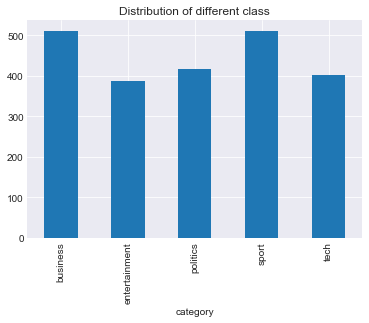

In [6]:
# check the class distribution
df.groupby('category')['title'].count().plot.bar(ylim=0)
plt.title('Distribution of different class');

The distribution of different categories are not imbalanced. If one category occupy a great portion, say 90%, then I think the dataset is imbalanced, which does not apply to current situation, so no worries.

### 2) Preprocess the news content
Basically remove non-words and word stemming.

Non-words removal means remove the numbers, alphabets, punctuations, symbols.

In [7]:
# function for remove non-words
def remove_nonwords(string):
    string = re.sub(r"\'s", "", string)        # remove 's in the string
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", "", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)  # remove alphabets
    string = re.sub(r"[0-9]\w+|[0-9]","", string)           # remove numbers
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()             # remove empty space and convert everything to lower letter

Word stemming means words are reduced to their stemmed form. For example, “discount”, “discounts”, “discounted” and “discounting” are all replaced with “discount”.

Martin Porter's Porter stemming algorithm is the most popular one. Martin Porter updated the original Porter stemmer to support other languages than English, he called it Porter2 stemmer or Snowball stemmer. 

Snowball English stemmer (**SnowballStemmer** of **nltk** library) will be used for stemming purpose. 

In [ ]:
# # apply non-word removal and word stemming on the original news content
# # PorterStemmer of nltk library will be used for stemming purpose.
# words = stopwords.words('english')
# stemmer = PorterStemmer()
# df['cleaned'] = df['content'].apply(lambda x: ' '.join([stemmer.stem(i) for i in remove_nonwords(x).split() if i not in words]))

In [8]:
# apply non-word removal and word stemming on the original news content
# SnowballStemmer of nltk library will be used for stemming purpose.
words = stopwords.words('english')
stemmer = SnowballStemmer('english')
df['cleaned'] = df['content'].apply(lambda x: ' '.join([stemmer.stem(i) for i in remove_nonwords(x).split() if i not in words]))

Check what are stopwords:

In [9]:
# show stopwords
words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Check the effect of non-word removal and word stemming:

In [10]:
# original news article
df['content'][0]

'Ad sales boost Time Warner profit\n \n Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.\n \n The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n \n Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try

In [11]:
# cleaned news article
df['cleaned'][0]

'ad sale boost time warner profit quarter profit us media giant timewarn jump three month decemb year earlier firm one biggest investor googl benefit sale high speed internet connect higher advert sale timewarn said fourth quarter sale rose profit buoy one gain offset profit dip warner bros less user aol time warner said friday own search engin googl internet busi aol mix fortun lost subscrib fourth quarter profit lower preced three quarter howev compani said aol under profit except item rose back stronger internet advertis revenu hope increas subscrib offer onlin servic free timewarn internet custom tri sign aol exist custom high speed broadband timewarn also restat result follow probe us secur exchang commiss sec close conclud time warner fourth quarter profit slight better analyst expect film divis saw profit slump help box offic flop alexand catwoman sharp contrast year earlier third final film lord ring trilog boost result full year timewarn post profit perform revenu grew financi

## 2. Machine learning:

### 1) Create training and test sets

In [12]:
# 80% of data for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(df['cleaned'], df['category_id'], test_size=0.2, random_state=0)

In [13]:
# cleaned news texts
X_train.head()

841     incred win anim award incred movi beaten shrek...
1748    hantuchova dubai last eight daniela hantuchova...
2118    power peopl say hp digit revolut focus let peo...
1174    amnesti chief lament war failur lack public ou...
1502    sa return mauritius top seed south africa retu...
Name: cleaned, dtype: object

In [14]:
# label of the news articles
y_train.head()

841     1
1748    3
2118    4
1174    2
1502    3
Name: category_id, dtype: int64

### 2) Convert news article to vector
Each news article must be transformed to a feature vector in order to be processed by a ML model. One common approach is bag-of-word, which consider the frequency of words presence in the articles and ignore the order in which the words occur.

**TfidfVectorizer** of **scikit-learn** library will be used to vectorize each news text. Usually, **TfidfVectorizer** take all unique words in the whole dataset(which having many articles) except stopwords as features when building a vocabulary list. A unique word is a feature. Stopwords like 'the', 'is', 'are' occur in every news article and they can't be used as signitures to differentiate different categories, so stopwords won't be used as features. 

The **TfidfVectorizer** actually perform two things: **CountVectorizer** and **TfidTransformer**. The **CountVectorizer** count the number of presence for every single word, this calculate the word feaquency. Then the **TfidTransformer** give each feature a weighting as it takes the document frequency of each feature into account. As a result, words like 'they', 'have', 'he', 'she' appearing in many documents will have a lower weight because they are quite common and not related to a certain category. Words like 'singer', 'online', 'government' appearing in less articles will have a higher weight becaue they are more relevant to the category of news. So **TfidfVectorizer** calculate a value for each feature by taking both word frequency and document fequency into consideration.

The formula that is used to compute the tf-idf of term t is tf-idf(d, t) = tf(t) * idf(d, t), and the idf is computed as idf(d, t) = log [ n / df(d, t) ] + 1, where n is the total number of documents and df(d, t) is the document frequency; the document frequency is the number of documents d that contain term t. The effect of adding “1” to the idf in the equation above is that terms with zero idf, i.e., terms that occur in all documents in a training set, will not be entirely ignored.

Important parameters of **TfidfVectorizer**:

**sublinear_tf**: often set to True to take the logarithmic form of the word frequency, i.e. replace tf with 1 + log(tf). This is to reduce the strong effect of very high frequency words because it seems unlikely that twenty occurrences of a word in a document truly carry twenty times the significance of a single occurrence.

**min_df**: set a threshold, so a unique word won't be used as a feature if it's document feaquency lower than this threshold. (will be turned in model training)

**ngram_range**: setting this parameter enable n-consecutive words to be considered as one feature in addition to the rule of one word as one feature. For example, if ngram_range=(1, 2), not only 'tennis' and 'player' but also 'tennis player' are features. (will be turned in model training)

**stop_words**: set to be 'english' according to the language of current data.

In [15]:
# extracting features from the training data using TfidfVectorizer
TfidVect = TfidfVectorizer(sublinear_tf=True, min_df=1, ngram_range=(1, 1), stop_words='english')
X_train_vect = TfidVect.fit_transform(X_train).toarray()
X_train_vect.shape

(1780, 17076)

There are 1780 news articles in the training set. Each news article is now represented by a 17076-length feature vector.

### 3) PCA 
Plot the data in a 2D plane is a good way to visualize how seperate between different classes. Since the dimension of Tfidfvectors is very high, PCA is used to project the data into a 2D plane whose two coordinate axes are the first and second principle components.

In [16]:
# apply PCA transformation
pca = PCA(n_components = 2).fit(X_train_vect)
X_pca = pca.transform(X_train_vect)
print(X_train_vect.shape, X_pca.shape)

(1780, 17076) (1780, 2)


After PCA, the dimension of the data is reduced from 17076 to 2. Please note that this PCA is used only for data visualization but not classification, so we create X_train_vect and keep X_train unchanged.

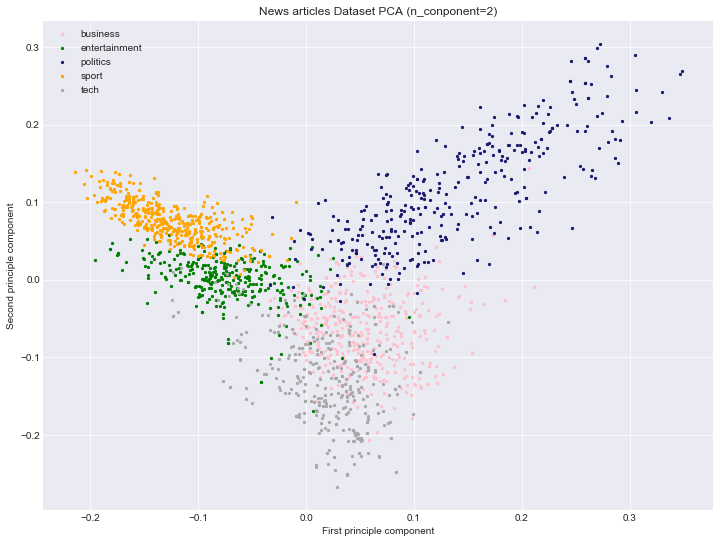

In [17]:
# plot the news dataset in 2D
f, ax = plt.subplots(figsize=(12, 9))
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
for category_id, category in enumerate(folders):
    points = X_pca[[y_train == category_id]]
    plt.scatter(points[:, 0], points[:, 1], s=5, c=colors[category_id], label=category)
    
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title('News articles Dataset PCA (n_conponent=2)')    
plt.legend();

It appear that this dataset is linearly separable. So I expect a linear classifier will works well.

### 4) Build a predictive model 
I build a pipeline which include newsVectorization, featureSelection, and classification all in one. First, the news raw texts will be converted to Tfidfvectors. Second a number of best features will be selected by **SelectKBest**. Third, the selected features will be used in the classification.

The best k features are selected using chi-square test. The chi-squared stats measure the dependence between each non-negative feature and the categories. Higher chi-squared stats value indicate higher correlation between a certain feature and a certain category. In other words, the occurrence of the word(feature) makes the occurrence of the category more likely (or less likely) since they are dependent. So features which are independent of the category can be filtered out using chi-square test. Parameter **k** will be turned in model training.

Support Vector Machine (SVM) with linear kernel will be used in classification. Linear SVM make an assumption that the training data is linearly saparable, this assumption is in line with the observation in the previous PCA plot. In addition, linear SVM aim at searching for maximum amount of margin between classes. 

Important parameters of Linear SVM:

**C**: control how much regularization. Smaller C, more regularization, encourage the classifier to find the large margin decision boundary, even this margin lead to more training samples mis-classified.  Large C, less regularization,classify the training data as good as possible, even use smaller margin decision boundary. (will be turned in the model training)

**penalty**: 'l1' use Lasso regularization, 'l2' use Ridge regularization. I test this parameter outside this script and find 'l2' perform better.

**dual**: Prefer dual=False when n_samples > n_features.

In [18]:
# create a pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(sublinear_tf=True, stop_words='english')), 
    ('featSelect', SelectKBest(chi2)), 
    ('classifier', LinearSVC(penalty='l2', max_iter=1000, dual=False))
])

In [19]:
# calculate the cross-validation accuracy of a baseline classifier
scores = cross_val_score(pipeline, X_train, y_train, scoring = 'accuracy', cv=10)
scores.mean()

0.60058801831561848

Accuracy score of the baseline classifier is 0.6, and the default k=10 (e.g. using 10 selected features) is not enough.

In [20]:
# parameters to be turned for model improvement, 8x10=80
grid_values = {
    'vectorizer__min_df': [1, 5],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'featSelect__k': [200, 500],
    'classifier__C': [1.0, 0.8],
}

In [21]:
# Search for optimal set of parameters, 10-fold cross-validation 
grid_search = GridSearchCV(pipeline, param_grid = grid_values, scoring = 'accuracy', cv=10)

# train the model on training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'vectorizer__min_df': [1, 5], 'vectorizer__ngram_range': [(1, 1), (1, 2)], 'featSelect__k': [200, 500], 'classifier__C': [1.0, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
# print the highest accuracy and the corresponding parameters
print(grid_search.best_score_)
print(grid_search.best_params_)

0.975842696629
{'classifier__C': 1.0, 'featSelect__k': 500, 'vectorizer__min_df': 5, 'vectorizer__ngram_range': (1, 1)}


In [23]:
# build a pipeline with optimized parameters
pipeline_opt = Pipeline([
    ('vectorizer', TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 1), stop_words='english')), 
    ('featSelect', SelectKBest(chi2, k=500)), 
    ('classifier', LinearSVC(C=1.0, penalty='l2', max_iter=1000, dual=False))
])

In [24]:
# calculate the desicion boundary 
model = pipeline_opt.fit(X_train, y_train)

In [25]:
# take out the well-trained components of the pipeline
vectorizer = model.named_steps['vectorizer']
chi = model.named_steps['featSelect']
clf = model.named_steps['classifier']

In [28]:
for j in chi.get_support(indices=True):
    print(j)

21
24
32
33
48
49
112
121
166
171
176
190
215
239
251
253
257
271
280
282
283
298
299
306
316
320
326
331
332
349
352
355
358
362
389
424
427
433
446
450
474
490
499
507
508
523
534
547
548
585
586
591
592
604
606
613
618
641
645
652
664
666
682
689
693
718
732
734
743
753
754
755
756
765
769
780
787
793
795
812
822
849
868
872
902
907
910
921
929
955
962
986
992
996
1002
1003
1006
1015
1044
1059
1061
1096
1109
1127
1131
1138
1139
1162
1174
1179
1194
1195
1196
1199
1214
1217
1221
1240
1241
1246
1293
1297
1299
1300
1308
1314
1318
1325
1335
1397
1401
1402
1403
1410
1421
1431
1432
1452
1469
1492
1499
1500
1501
1510
1522
1523
1525
1539
1570
1571
1581
1622
1623
1637
1656
1661
1687
1701
1720
1725
1755
1764
1769
1772
1777
1787
1788
1790
1793
1794
1799
1803
1811
1846
1851
1852
1877
1883
1946
1952
1955
1964
1965
1974
1976
1981
1982
1999
2005
2025
2027
2032
2039
2041
2046
2058
2059
2062
2066
2070
2091
2106
2116
2127
2137
2139
2141
2178
2204
2216
2222
2240
2249
2283
2284
2289
2311
2313
2333
2334


In [29]:
# list the 500 best features(keywords) selected using chi-squared test
feature_names = vectorizer.get_feature_names()                                # all features 
feature_names = [feature_names[i] for i in chi.get_support(indices=True)]     # selected K features
feature_names = np.asarray(feature_names)
feature_names

array(['academi', 'access', 'accord', 'account', 'actor', 'actress',
       'airlin', 'album', 'analyst', 'andi', 'angel', 'annual', 'appl',
       'argu', 'arsenal', 'art', 'artist', 'asset', 'asylum', 'athen',
       'athlet', 'audienc', 'audio', 'australian', 'avail', 'aviat',
       'award', 'babi', 'backbench', 'ball', 'band', 'bank', 'bankruptci',
       'barcelona', 'beat', 'benitez', 'berlin', 'best', 'bid', 'biggest',
       'blair', 'blog', 'blunkett', 'boe', 'boers', 'bookmak', 'boss',
       'box', 'boy', 'brit', 'britain', 'broadband', 'broadcast', 'brown',
       'browser', 'bt', 'budget', 'busi', 'buy', 'cabinet', 'camera',
       'campaign', 'captain', 'career', 'carmak', 'categori', 'celebr',
       'celtic', 'ceremoni', 'champion', 'championship', 'chanc',
       'chancellor', 'charl', 'chart', 'chelsea', 'chief', 'china', 'chip',
       'cinema', 'civil', 'click', 'club', 'coach', 'com', 'comedi',
       'comic', 'common', 'compani', 'comput', 'concert', 'connect',
 

In [30]:
# List top 10 keywords for each category
# This is a multi-class classification problem, and it is using one-vs-all method, 
# that is one classifier to differentiate one specific class from others
# so there are 5 classifiers for 5 categories
target_names = folders
print('Top 10 keywords per class:')
for i, label in enumerate(target_names):
    top10 = np.argsort(clf.coef_[i])[-10:]                 # index of top 10 largest coefficient
    print(label + ': ' + ', '.join(feature_names[top10]))

Top 10 keywords per class:
business: financi, analyst, busi, invest, share, econom, compani, market, bank, firm
entertainment: chart, angel, broadcast, album, band, tv, star, singer, music, film
politics: council, tori, polic, govern, mps, labour, blair, minist, parti, secretari
sport: cup, injuri, win, olymp, player, dope, club, athlet, coach, match
tech: video, websit, peopl, use, softwar, game, technolog, user, comput, onlin


These top keywords used by the model for prediction are quite sensible.

If an unseen news article have similar characteristics with the previous training data, the model should correctly predict the category for this unseen article. However, if the unseen article is very different from the previous training set, the model may not be able to provide an accurate prediction. Therefore, the model should continuely be trained with new unseen data so as to adapt it's parameters overtime and continue to provide useful prediction. Use online learning.

## 3. Evaluation

In [31]:
# calculate accuracy
print('accuracy score_Training: ' + str(model.score(X_train, y_train)))
print('accuracy score_Test: ' + str(model.score(X_test, y_test)))

accuracy score_Training: 0.992134831461
accuracy score_Test: 0.973033707865


The model perform quite well with prediction accuracy equals to 0.973 .

In [32]:
# calculate prediction for test set
y_predict_test = model.predict(X_test)

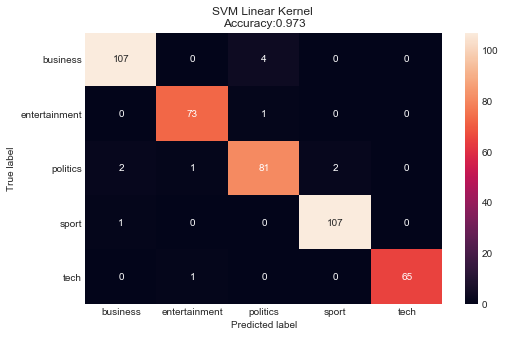

In [33]:
# calculate confusion matrix
f, ax = plt.subplots(figsize=(8, 5))
conf_mat = confusion_matrix(y_test, y_predict_test)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=folders, yticklabels=folders)           
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict_test)));

### Check the news article that is wrongly predicted

In [55]:
actual = 2
predicted = 0
pd.set_option('display.max_rows', 5000)
(y_test == actual) & (y_predict_test == predicted)

384     False
1983    False
985     False
1386    False
1294    False
1293    False
1259    False
1978    False
1123    False
1405    False
1820    False
529     False
1135    False
1315    False
1050    False
1760    False
453     False
39      False
1741    False
1976    False
621     False
1170    False
487     False
1205    False
2155    False
446     False
792     False
148     False
386     False
491     False
195     False
1736    False
1638    False
1569    False
930     False
53      False
638     False
1629    False
910     False
1254    False
1936    False
1849    False
794     False
634     False
1295    False
229     False
2106    False
461     False
98      False
107     False
465     False
1373    False
283     False
1280    False
1955    False
1988    False
1577    False
2186    False
379     False
2134    False
276     False
1793    False
1129    False
1958    False
1339    False
716     False
1210    False
135     False
1380    False
1015    False
587     False
1544  

In [56]:
# find the index
actual = 2
predicted = 0
y_test.index[(y_test == actual) & (y_predict_test == predicted)]

Int64Index([971, 918], dtype='int64')

In [62]:
# show the cleaned news
df.loc[971]['cleaned']

'report attack defenc spend ministri defenc criticis soar spend cost grow delay top equip project nation audit offic report biggest project say cost risen past year say littl evid mod perform improv despit introduct smart acquisit polici six year ago senior defenc offici told bbc lesson learn nao annual report show total cost project cover expect reach higher origin plan total delay amount month averag individu delay rise three month sir john bourn head nao said problem show principl scheme known smart acquisit consist appli mani problem trace fact mod spent enough time resourc assess phase report say nao found project launch sinc start scheme show worri tendenc older legaci project eurofight senior defenc offici speak bbc defenc correspond paul adam said although figur still good enough report reflect unrealist expect earli project cycl year overspend signific less last year total defenc procur agenc respons buy defenc equip improv lord bach minist defenc procur said obvious still dis

### Make prediction for today's news
Unseen_news_1 is from: https://www.bbc.co.uk/news/entertainment-arts-45481149

Unseen_news_2 is from: https://www.bbc.co.uk/news/technology-45523304

In [34]:
# collect and preprocess data
file_path = 'Unseen_news_2.txt'
with open(file_path) as f:
    data = f.readlines()   
    
X_forPredict_orig = ' '.join(data)
X_forPredict_cleaned = ' '.join([stemmer.stem(i) for i in remove_nonwords(X_forPredict_orig).split() if i not in words])

In [35]:
X_forPredict_orig

'YouTube nursery-rhyme channel with billions of views sold\n \n One of the most popular YouTube channels in the world, which features animated nursery rhymes, has been sold.\n \n Little Baby Bum was founded by a London-based couple in 2011 and has racked up 17.5 billion views in its time.\n \n It was bought by a firm called Moonbug for an undisclosed sum, as first reported by Bloomberg.\n \n Informed industry-watchers think the agency may well have paid several million pounds for the YouTube channel.\n \n Co-founder Derek Holder confirmed to the BBC that the sale had taken place but he declined to comment on the sum offered by the buyer.\n \n "We were looking to take the brand to the next level," he said. "We saw who the team were behind Moonbug and what their plans would be, which would be to keep the core the same, but... make episodes for TV around the world."\n \n He added that it felt like the right time to hand the brand over, after a "fantastic run".\n \n Little Baby Bum usually

In [36]:
X_forPredict_cleaned

'youtub nurseri rhyme channel billion view sold one popular youtub channel world featur anim nurseri rhyme sold littl babi bum found london base coupl rack billion view time bought firm call moonbug undisclos sum first report bloomberg inform industri watcher think agenc may well paid sever million pound youtub channel co founder derek holder confirm bbc sale taken place declin comment sum offer buyer look take brand next level said saw team behind moonbug plan would would keep core make episod tv around world ad felt like right time hand brand fantast run littl babi bum usual publish long video often hour featur anim charact perform nurseri rhyme mr holder told guardian newspap wife canni came mani design concept video also explain video intent long parent could leav toddler front extend period without repeat press play lot shorter video youtub channel sinc grown children entertain empir week video upload magazin avail buy onlin merchandis mind blow surreal honest said mr holder refer

In [37]:
print('The category of this news is predicted as: ' + folders[model.predict([X_forPredict_cleaned])[0]]) 

The category of this news is predicted as: tech


This model provide correct prediction for today's news.

## 4. Conclusions
In this script, a preditive model for automatic bbc news classification is developed and evaluated. The process pipeline include: (1) clean the raw text data; (2) extract tf-idf features from cleaned text; (3) select best features using chi-square test; (4) train and apply the linear SVM model to predict the category for unseen news documents. Optimal setting is seached by turning the important parameters of the model, obtaining a classification accuracy of 97%.

In future, it would be interesting to try out different classifiers, such as Random Forest, Gradient Boosting Trees, etc. 

## 5. References

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer

https://nlp.stanford.edu/IR-book/html/htmledition/sublinear-tf-scaling-1.html

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2

http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html#sphx-glr-auto-examples-text-document-classification-20newsgroups-py

https://cloud.google.com/blog/products/gcp/problem-solving-with-ml-automatic-document-classification

https://github.com/suraj-deshmukh/BBC-Dataset-News-Classification

https://github.com/giuseppebonaccorso/bbc_news_classification_comparison/blob/master/BBC%20News%20classification%20comparison.ipynb

https://www.youtube.com/watch?v=5xDE06RRMFk&ab_channel=Coding-Maniac

https://www.youtube.com/watch?v=CArkneSPNr4&ab_channel=Coding-Maniac

https://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization

https://www.quora.com/What-is-the-most-popular-stemming-algorithms-in-Text-Classification

https://nlp.stanford.edu/IR-book/html/htmledition/mutual-information-1.html

https://nlp.stanford.edu/IR-book/html/htmledition/feature-selectionchi2-feature-selection-1.html